# Projeto: Fraude de Vinhos (Support Vector Machines)

## [Fraude de Vinhos](https://en.wikipedia.org/wiki/Wine_fraud)

Fraude de vinhos está relacionada com os aspectos comerciais do vinho. Os tipos mais comuns de fraude são os que os vinhos são adulterados com produtos baratos, químicos que podem ser perigosos e adoçantes. Outra forma de fraude é a troca e reclassificação de vinhos baratos e mais inferiores para vinhos de marca mais caras.


## Objetivo do projeto:
Uma companhia de distribuição foi vítima de fraude recentemente e realizou uma auditoria com várias amostras de vinho através de análises químicas das amostras. A empresa distribui vinhos de alta qualidade, mas foi enganada por um fornecedor que estava tentando passar vinhos baratos e de baixa qualidade como vinhos caros.

Nosso objetivo é criar um modelo de machine learning que detecta se um vinho é de baixa qualidade (fraudado) ou se é legítimo.

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Primeiro vamos importar os dados e ver as variáveis.

In [2]:
df = pd.read_csv('C:\\Users\\henri/pythonNotebooks/DATA/wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


A coluna que servirá como variável de classificação é a 'quality'. Vamos ver quais as únicas opções disponíveis nessa feature.

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Com um countplot podemos ver que a quantidade de vinhos de categoria 'Legit' e 'Fraud' é desbalanceado.

<AxesSubplot:xlabel='quality', ylabel='count'>

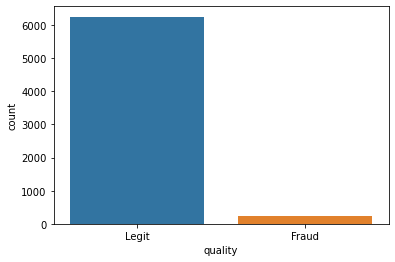

In [5]:
sns.countplot(data=df,x='quality')

Aqui separamos os vinhos em vermelho ('red') e branco ('white') categorizando cada um por 'Legit' e 'Fraud'.

<AxesSubplot:xlabel='type', ylabel='count'>

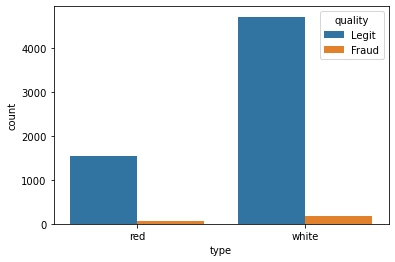

In [6]:
sns.countplot(data=df,x='type',hue='quality')

In [7]:
df[['quality','type']].value_counts()

quality  type 
Legit    white    4715
         red      1536
Fraud    white     183
         red        63
dtype: int64

In [15]:
print('Porcentagem de vinho vermelho que é fraudado.')
reds = df[df['type']=='red']
100*len(reds[reds['quality']=='Fraud'])/len(reds)

Porcentagem de vinho vermelho que é fraudado.


3.9399624765478425

In [19]:
print('Porcentagem de vinho branco que é fraudado.')
whites = df[df['type']=='white']
100*len(whites[whites['quality']=='Fraud'])/len(whites)

Porcentagem de vinho branco que é fraudado.


3.736218864842793

Vemos que 3,93% dos vinhos vermelhos e 3,73% dos vinhos brancos são fraude.

---

Agora vamos ver qual a correlação de cada feature com a feature 'quality'. Para isso, primeiro transformamos a coluna para 0 e 1 e depois vemos qual a correlação. Depois fazemos um barplot para melhor visualização das correlações.

In [20]:
df['Is Fraud'] = df['quality'].map({'Fraud': 1, 'Legit': 0})

In [21]:
df.corr()['Is Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Is Fraud                1.000000
Name: Is Fraud, dtype: float64

<AxesSubplot:>

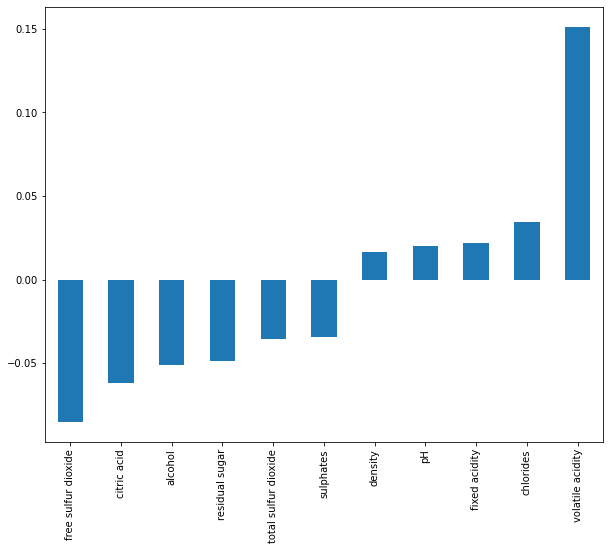

In [22]:
df.corr()['Is Fraud'][:-1].sort_values().plot(kind='bar',figsize=(10,8))

Com um clustermap podemos observar melhor a relação entre as features.

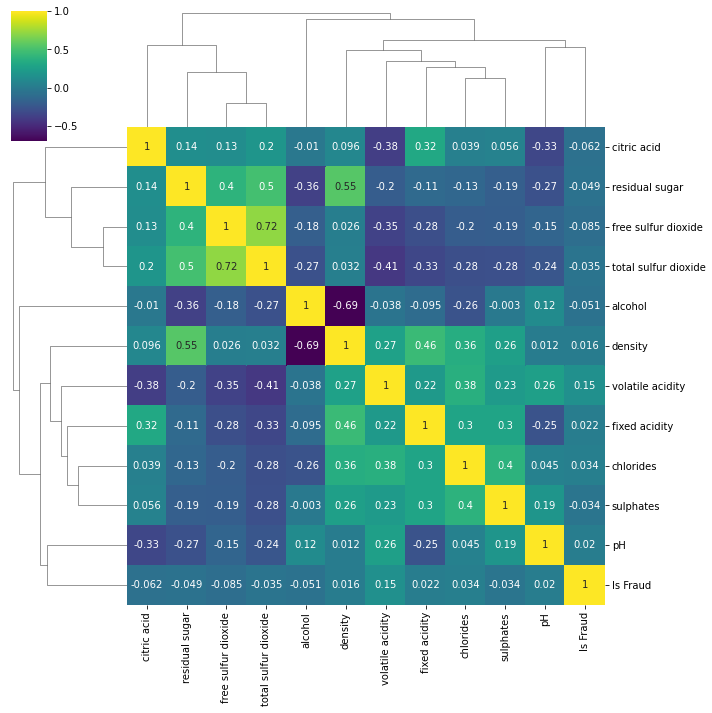

In [24]:
sns.clustermap(data=df.corr(), cmap='viridis',annot=True)

---

Agora iremos criar nosso modelo de machine learning. Primeiro temos que transformar a coluna categórica 'type' para variáveis mudas.

In [25]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Is Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


Separamos nossos dados em features (X) e target label (y) e realizamos um train test split.

In [27]:
df = df.drop('Is Fraud',axis=1)
X = df.drop('quality',axis=1)

In [28]:
y = df['quality']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Precisamos escalonar os dados para que não haja nenhum erro na hora de aplicar nosso modelo.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_x_train = scaler.fit_transform(X_train)

In [34]:
scaled_x_test = scaler.transform(X_test)

Agora criaremos um modelo de Support Vector Machine classifier. Usaremos um grid search para ver quais os melhores parâmetros C e gamma para o modelo.

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [36]:
svc_model = SVC(class_weight='balanced') 
# usamos class_weight como 'balanced' pois vimos no início que os dados estão desbalanceados

In [40]:
param_grid = {'C': [0.001,0.01,0.1,0.5,1],
             'gamma': ['scale','auto'],
             'kernel': ['linear','rbf','poly'],
             'degree': [1,2,3,4,5]}

In [41]:
grid_model = GridSearchCV(estimator=svc_model,param_grid=param_grid)

In [42]:
grid_model.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [43]:
grid_model.best_params_ 

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

Com isso vemos que o melhor valor para C é 0.001, para gamma é 'auto' e o kernel usado foi um polinomio de grau 2.

---

Finalmente, vamos montar uma confusion matrix e usar o classification_report para vermos a precisão e recall do modelo que montamos.

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
y_pred = grid_model.predict(scaled_x_test)

In [46]:
confusion_matrix(y_test,y_pred)

array([[  3,  24],
       [  6, 617]], dtype=int64)

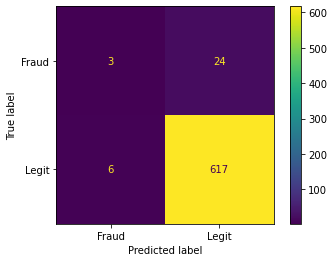

In [48]:
plot_confusion_matrix(grid_model,scaled_x_test,y_test)

In [49]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



Pela matriz acima podemos ver que 6 vinhos legítimos foram classificados como fraude e 24 vinhos falsos classificados como legítimos pelo modelo. A precisão e o recall para a classe 'Fraud' não foi tão boa comparado com a classe 'Legit'. Talvez outro modelo além do SVC seja melhor para conseguir encontrar com maior precisão os vinhos falsos, ou então, devido a dificuldade do problema com análises químicas entre as bebidas, maiores quantidades de features melhore o desempenho do modelo.